In [1]:
import cv2
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
doss1 = "C:/Users/ah-ma/Desktop/Samashi/Studying/Master/S3/Multimedia Mining And Indexing/Part 1 - Traitement d'Image/Labs/Lab02/images/formes/doss1/"
doss2 = "C:/Users/ah-ma/Desktop/Samashi/Studying/Master/S3/Multimedia Mining And Indexing/Part 1 - Traitement d'Image/Labs/Lab02/images/formes/doss2/"

In [7]:
def get_hu_moments(image_path):
    image = Image.open(image_path)
    image = np.array(image)

    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    largest_contour = max(contours, key=cv2.contourArea) if contours else None
    if largest_contour is not None:
        moments = cv2.moments(largest_contour)
        hu_moments = cv2.HuMoments(moments).flatten()
        # hu_moments = np.sign(hu_moments) * np.log(np.abs(hu_moments))
        # hu_min = np.min(hu_moments)
        # hu_max = np.max(hu_moments)
        # if hu_max - hu_min != 0:
        #     hu_moments = (hu_moments - hu_min) / (hu_max - hu_min)
        return hu_moments
    return None

In [8]:
def main():
    for img1 in os.listdir(doss1):
        path1 = os.path.join(doss1, img1)
        hu1 = get_hu_moments(path1)
        if hu1 is None:
            continue

        results = []
        for img2 in os.listdir(doss2):
            path2 = os.path.join(doss2, img2)
            hu2 = get_hu_moments(path2)
            if hu2 is None:
                continue
            
            # distance = cv2.matchShapes(hu1, hu2, cv2.CONTOURS_MATCH_I2, 0)
            distance = np.linalg.norm(hu1 - hu2)
            results.append((path2, distance))

        results = sorted(results, key=lambda x: x[1])[:6]

        print(f"\nTop 6 images similaires pour {img1}:")
        for path2, dist in results:
            print(f"Image: {os.path.basename(path2)}, Distance: {dist:.5f}")

        fig, axes = plt.subplots(1, len(results) + 1, figsize=(15, 5))

        img1 = Image.open(path1)
        axes[0].imshow(img1, cmap='gray')
        axes[0].set_title("Source")
        axes[0].axis("off")

        for i, (img2_path, dist) in enumerate(results):
            img2 = Image.open(img2_path)
            axes[i + 1].imshow(img2, cmap='gray')
            axes[i + 1].set_title(f"Dist: {dist:.5f}")
            axes[i + 1].axis("off")

        plt.tight_layout()
        plt.show()


Top 6 images similaires pour apple-1.gif:
Image: apple-2.gif, Distance: 0.00184
Image: apple-5.gif, Distance: 0.00593
Image: apple-4.gif, Distance: 0.00637
Image: apple-3.gif, Distance: 0.00643
Image: bell-2.gif, Distance: 0.02255
Image: bell-3.gif, Distance: 0.02567


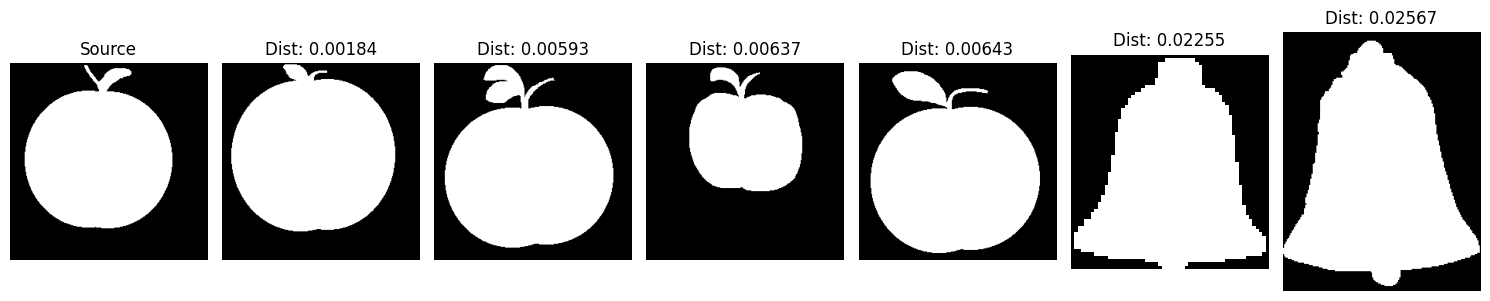


Top 6 images similaires pour bell-1.gif:
Image: bell-2.gif, Distance: 0.00075
Image: bell-3.gif, Distance: 0.00268
Image: bell-4.gif, Distance: 0.01018
Image: bell-5.gif, Distance: 0.01283
Image: apple-3.gif, Distance: 0.01690
Image: apple-4.gif, Distance: 0.01693


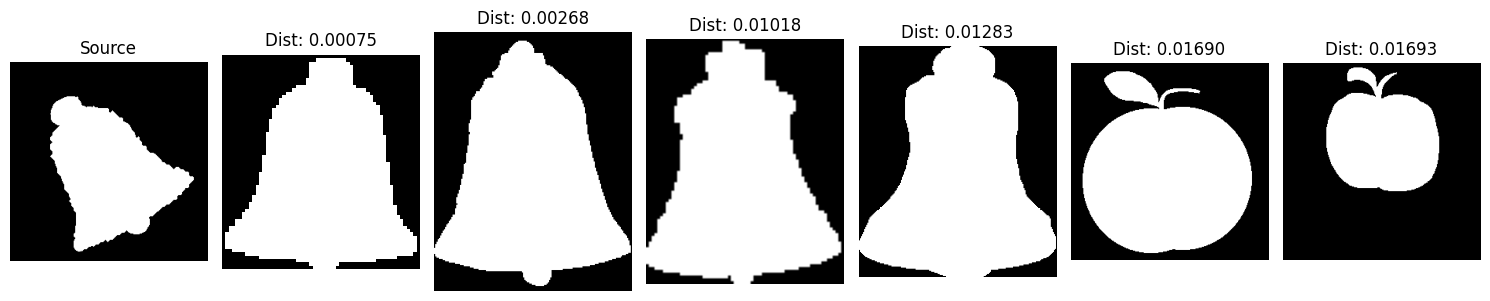


Top 6 images similaires pour bird-7.gif:
Image: bird-8.gif, Distance: 0.00005
Image: bird-13.gif, Distance: 0.01628
Image: camel-5.gif, Distance: 0.02519
Image: bird-14.gif, Distance: 0.03461
Image: bird-15.gif, Distance: 0.04128
Image: camel-2.gif, Distance: 0.06197


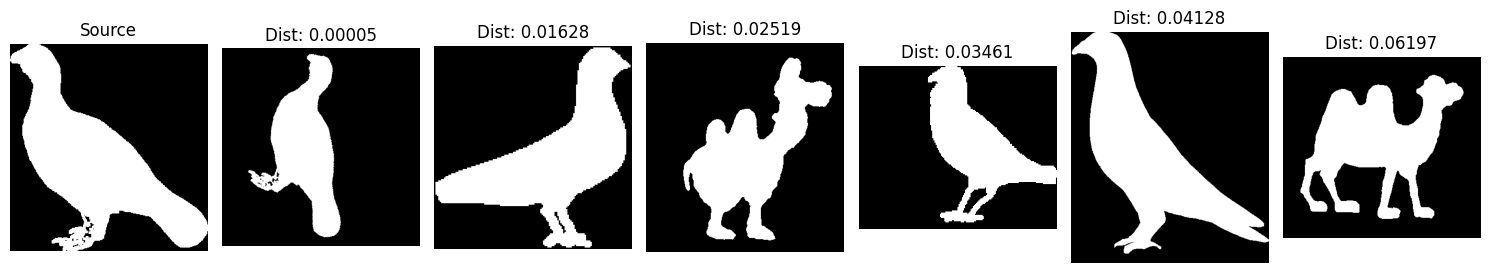


Top 6 images similaires pour camel-1.gif:
Image: camel-3.gif, Distance: 0.00953
Image: device0-2.gif, Distance: 0.01249
Image: device0-3.gif, Distance: 0.01341
Image: device0-5.gif, Distance: 0.01802
Image: bell-5.gif, Distance: 0.02053
Image: camel-4.gif, Distance: 0.02187


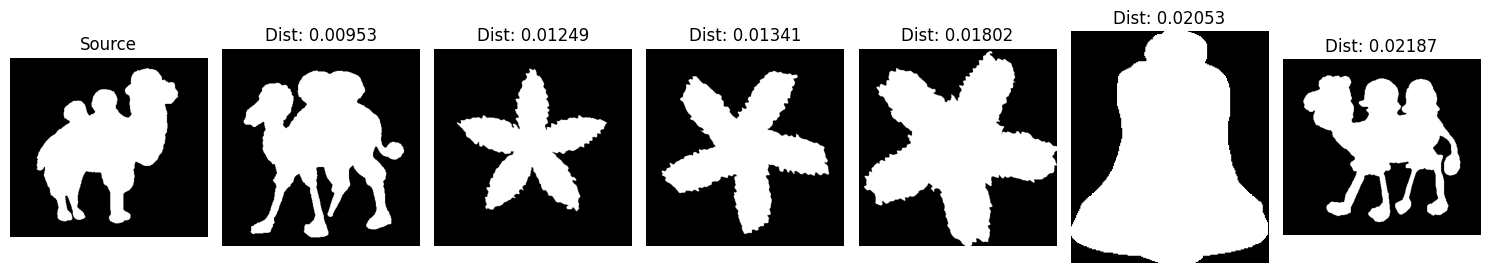


Top 6 images similaires pour device0-1.gif:
Image: device0-3.gif, Distance: 0.00023
Image: device0-2.gif, Distance: 0.00130
Image: camel-3.gif, Distance: 0.00924
Image: camel-4.gif, Distance: 0.01266
Image: device0-4.gif, Distance: 0.02239
Image: device0-5.gif, Distance: 0.02305


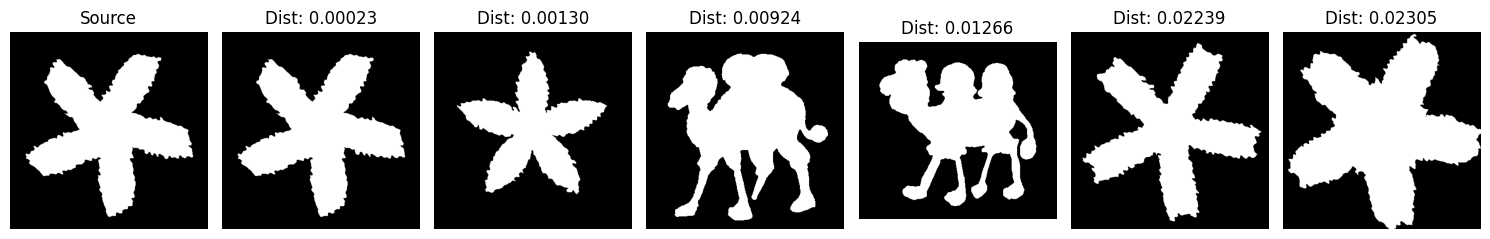

In [9]:
main()